# Twilio Brasil - Signal São Paulo 2025

In [2]:
%pip install twilio python-dotenv matplotlib numpy diagrams graphviz --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
from twilio.rest import Client
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import IPython

# Find your Account SID and Auth Token at twilio.com/console
# and set the environment variables. See http://twil.io/secure
account_sid = os.environ["TWILIO_ACCOUNT_SID"]
auth_token = os.environ["TWILIO_AUTH_TOKEN"]
client = Client(account_sid, auth_token)


## Architectural Overview

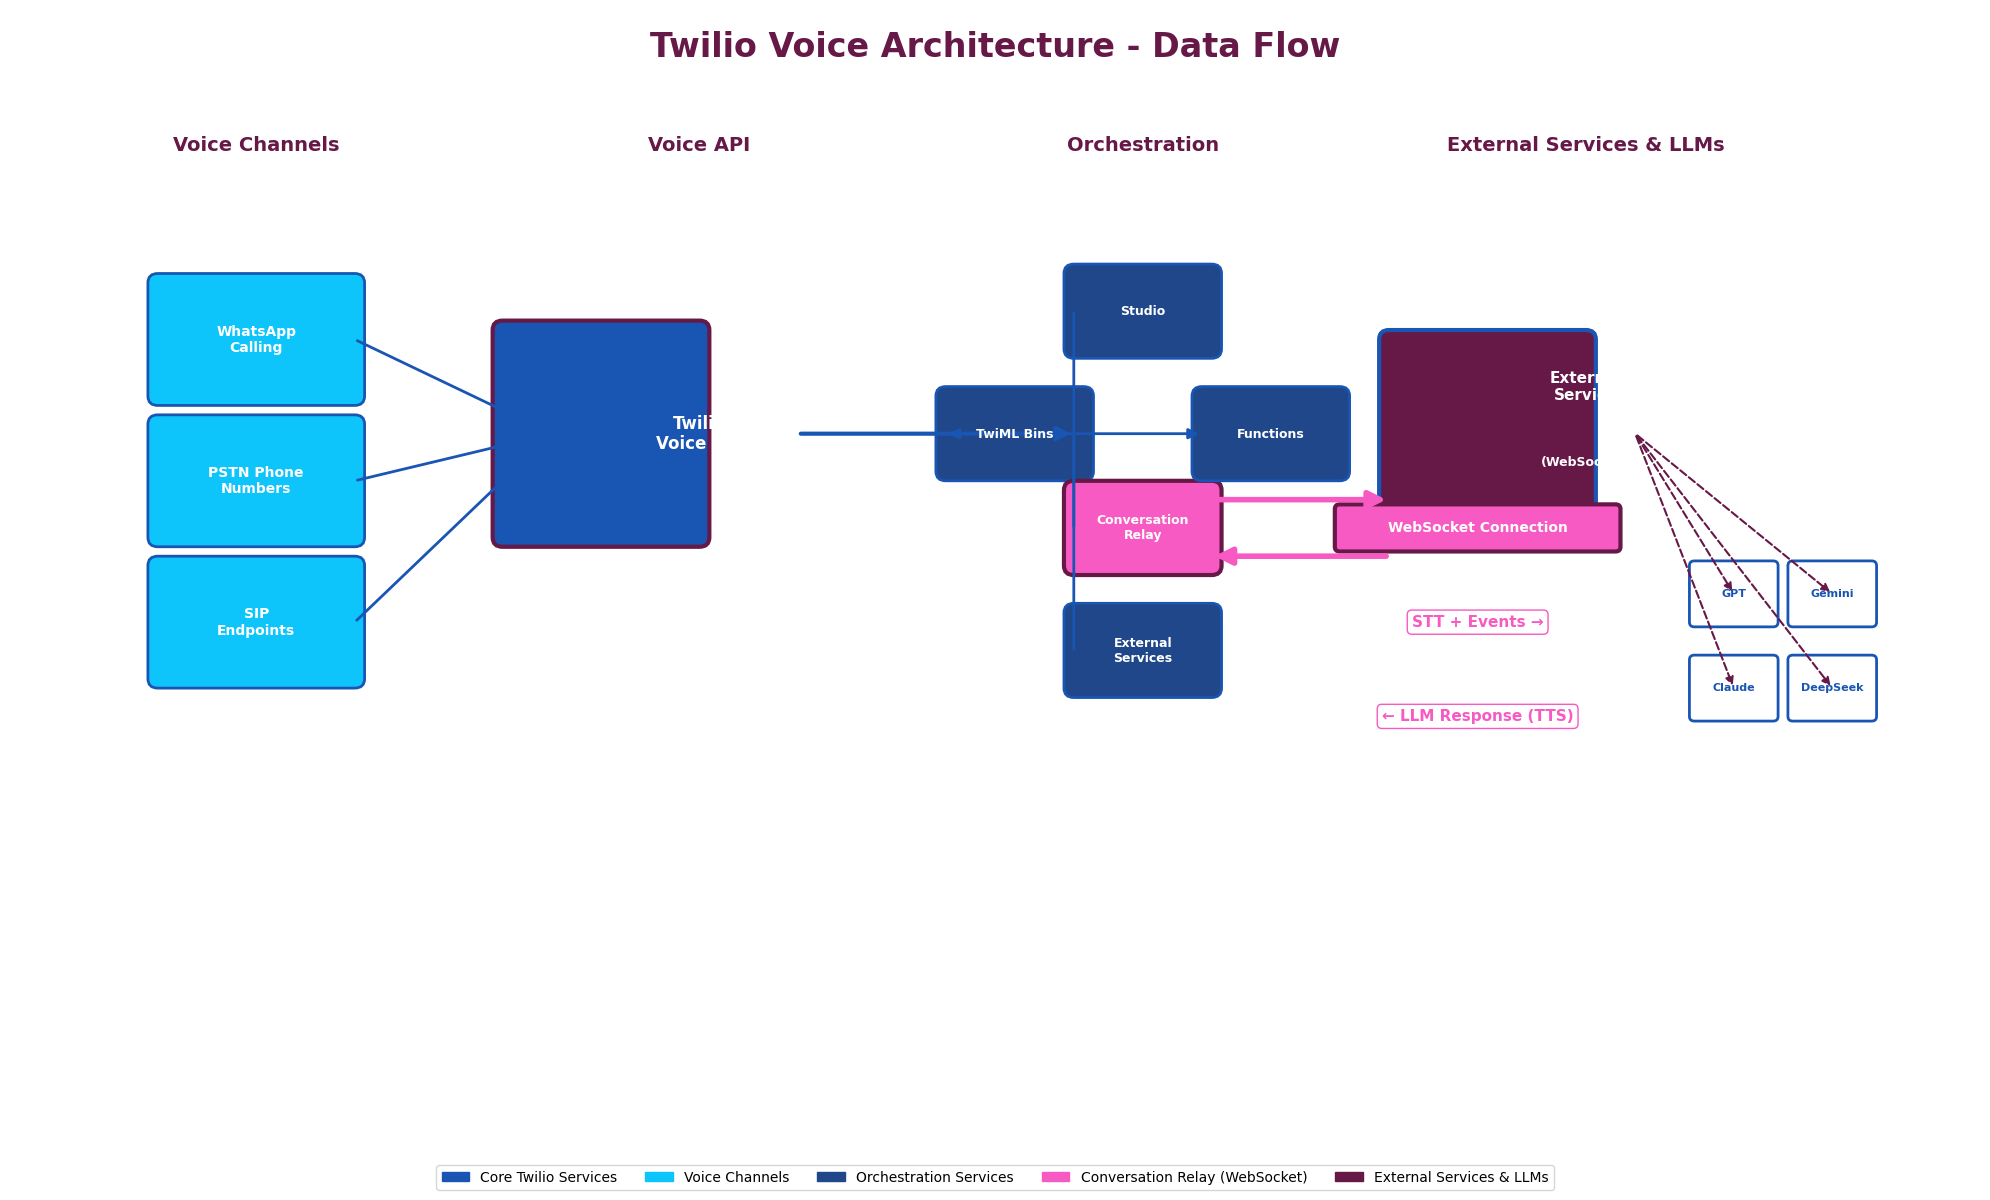

In [15]:
from matplotlib.patches import FancyBboxPatch, ConnectionPatch

# This code creates an improved Twilio Voice Architecture diagram with better alignment and new color scheme
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.set_xlim(0, 20)
ax.set_ylim(0, 12)
ax.axis('off')

# New color scheme
accent = '#F75AC3'
main = '#1955B3'
main2 = '#661847'
background = '#204789'
accent2 = '#0DC5FB'

# Title
ax.text(10, 11.5, 'Twilio Voice Architecture - Data Flow', fontsize=24, fontweight='bold', 
    ha='center', color=main2)

# Lane headers
lane_headers = [
    ('Voice Channels', 2.5, 10.5),
    ('Voice API', 7, 10.5),
    ('Orchestration', 11.5, 10.5),
    ('External Services & LLMs', 16, 10.5)
]

for name, x, y in lane_headers:
    ax.text(x, y, name, fontsize=14, fontweight='bold', ha='center', color=main2)

# Lane 1: Voice Channels (x=1-4)
channels = [
    ('WhatsApp\nCalling', 2.5, 8.5),
    ('PSTN Phone\nNumbers', 2.5, 7),
    ('SIP\nEndpoints', 2.5, 5.5)
]

for name, x, y in channels:
    box = FancyBboxPatch((x-1, y-0.6), 2, 1.2, boxstyle="round,pad=0.1",
             facecolor=accent2, edgecolor=main, linewidth=2)
    ax.add_patch(box)
    ax.text(x, y, name, ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Lane 2: Voice API (x=5.5-8.5)
voice_api_box = FancyBboxPatch((6-1, 6.4), 2, 2.2, boxstyle="round,pad=0.1",
                   facecolor=main, edgecolor=main2, linewidth=3)
ax.add_patch(voice_api_box)
ax.text(7, 7.5, 'Twilio\nVoice API', ha='center', va='center', 
    fontsize=12, fontweight='bold', color='white')

# Lane 3: Orchestration (x=10-13)
orchestration_items = [
    ('Studio', 11.5, 8.8),
    ('TwiML Bins', 10.2, 7.5),
    ('Conversation\nRelay', 11.5, 6.5),
    ('Functions', 12.8, 7.5),
    ('External\nServices', 11.5, 5.2)
]

for name, x, y in orchestration_items:
    if 'Conversation' in name:
        box = FancyBboxPatch((x-0.7, y-0.4), 1.4, 0.8, boxstyle="round,pad=0.1",
                     facecolor=accent, edgecolor=main2, linewidth=3)
    else:
        box = FancyBboxPatch((x-0.7, y-0.4), 1.4, 0.8, boxstyle="round,pad=0.1",
                     facecolor=background, edgecolor=main, linewidth=2)
    ax.add_patch(box)
    ax.text(x, y, name, ha='center', va='center', fontsize=9, fontweight='bold', color='white')

# Lane 4: External Services & LLMs (x=14.5-18.5)
# Main external service box
ext_service_box = FancyBboxPatch((15-1, 7.5-1), 2, 2, boxstyle="round,pad=0.1",
                 facecolor=main2, edgecolor=main, linewidth=3)
ax.add_patch(ext_service_box)
ax.text(16, 8, 'External\nService', ha='center', va='center', 
    fontsize=11, fontweight='bold', color='white')
ax.text(16, 7.2, '(WebSocket)', ha='center', va='center', 
    fontsize=9, fontweight='bold', color='white')

# LLM Models grid
llm_models = ['GPT', 'Gemini', 'Claude', 'DeepSeek']
llm_positions = [(17.5, 5.8), (18.5, 5.8), (17.5, 4.8), (18.5, 4.8)]

for model, (x, y) in zip(llm_models, llm_positions):
    model_box = FancyBboxPatch((x-0.4, y-0.3), 0.8, 0.6, boxstyle="round,pad=0.05",
                   facecolor='white', edgecolor=main, linewidth=2)
    ax.add_patch(model_box)
    ax.text(x, y, model, ha='center', va='center', fontsize=8, fontweight='bold', color=main)

# WebSocket connection indicator (emphasized)
ws_box = FancyBboxPatch((13.5, 6.3), 2.8, 0.4, boxstyle="round,pad=0.05",
            facecolor=accent, edgecolor=main2, linewidth=3)
ax.add_patch(ws_box)
ax.text(14.9, 6.5, 'WebSocket Connection', ha='center', va='center', 
        fontsize=10, fontweight='bold', color='white')

# Data flow labels (emphasized)
ax.text(14.9, 5.5, 'STT + Events →', ha='center', va='center', 
        fontsize=11, fontweight='bold', color=accent, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=accent))
ax.text(14.9, 4.5, '← LLM Response (TTS)', ha='center', va='center', 
        fontsize=11, fontweight='bold', color=accent,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=accent))

# FIXED CONNECTIONS
# 1. Channels to Voice API - all converge to center
for _, x, y in channels:
    # Direct connection to Voice API center
    arrow = ConnectionPatch((x+1, y), (5.5, 7.5), "data", "data",
               arrowstyle="-|>", shrinkA=2, shrinkB=2, 
               mutation_scale=15, fc=main, ec=main, linewidth=2)
    ax.add_patch(arrow)

# 2. Voice API to Orchestration hub (cleaner single connection)
arrow_main = ConnectionPatch((8, 7.5), (10.8, 7.5), "data", "data",
                arrowstyle="-|>", shrinkA=2, shrinkB=2, 
                mutation_scale=20, fc=main, ec=main, linewidth=3)
ax.add_patch(arrow_main)

# 3. Hub distribution to orchestration services (fixed branching)
hub_x = 10.8
hub_y = 7.5

# Vertical distribution lines from hub
vertical_points = [8.8, 7.5, 6.5, 5.2]  # y-coordinates for each service
for target_y in vertical_points:
    if target_y != hub_y:  # Don't draw line to itself
        # Vertical line from hub
        arrow_v = ConnectionPatch((hub_x, hub_y), (hub_x, target_y), "data", "data",
                     arrowstyle="-", shrinkA=1, shrinkB=1, 
                     fc=main, ec=main, linewidth=2)
        ax.add_patch(arrow_v)

# Horizontal connections to each service
for name, x, y in orchestration_items:
    if x != hub_x:  # Only for services not at hub x-position
        # Horizontal connection from vertical line to service
        arrow_h = ConnectionPatch((hub_x, y), (x-0.7, y), "data", "data",
                     arrowstyle="-|>", shrinkA=1, shrinkB=2, 
                     mutation_scale=15, fc=main, ec=main, linewidth=2)
        ax.add_patch(arrow_h)
    else:  # Direct connection for TwiML Bins at hub position
        arrow_direct = ConnectionPatch((hub_x, hub_y), (x-0.7, y), "data", "data",
                      arrowstyle="-|>", shrinkA=2, shrinkB=2, 
                      mutation_scale=15, fc=main, ec=main, linewidth=2)
        ax.add_patch(arrow_direct)

# 4. MAIN FOCUS: Conversation Relay to External Service WebSocket connection
# STT + Events arrow (emphasized)
arrow_stt = ConnectionPatch((12.2, 6.8), (14, 6.8), "data", "data",
               arrowstyle="-|>", shrinkA=2, shrinkB=2, 
               mutation_scale=25, fc=accent, ec=accent, linewidth=4)
ax.add_patch(arrow_stt)

# LLM Response arrow (emphasized)
arrow_tts = ConnectionPatch((14, 6.2), (12.2, 6.2), "data", "data",
               arrowstyle="-|>", shrinkA=2, shrinkB=2, 
               mutation_scale=25, fc=accent, ec=accent, linewidth=4)
ax.add_patch(arrow_tts)

# 5. External Service to LLMs connections (cleaner approach)
for model, (x, y) in zip(llm_models, llm_positions):
    # Connections from external service center to each LLM
    arrow_to_llm = ConnectionPatch((16.5, 7.5), (x, y), "data", "data",
                   arrowstyle="-|>", shrinkA=2, shrinkB=2, 
                   mutation_scale=12, fc=main2, ec=main2, linewidth=1.5, linestyle='--')
    ax.add_patch(arrow_to_llm)

# Legend
legend_elements = [
    patches.Patch(color=main, label='Core Twilio Services'),
    patches.Patch(color=accent2, label='Voice Channels'),
    patches.Patch(color=background, label='Orchestration Services'),
    patches.Patch(color=accent, label='Conversation Relay (WebSocket)'),
    patches.Patch(color=main2, label='External Services & LLMs')
]

ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)

plt.tight_layout()
plt.show()

In [22]:
%pip install mermaid-py --quiet

from mermaid import Mermaid
from IPython.display import display

# Fixed Mermaid diagram definition string
# This diagram shows the data flow for a voice call integrated with an external LLM service.
mermaid_string = """
graph TD
    %% Define subgraphs to group related components
    subgraph A["Step 1: Inbound / Outbound Call"]
        PSTN["PSTN Phone Numbers"]
        SIP["SIP Endpoints"]
        WhatsApp["WhatsApp Calling"]
        WebRTC["WebRTC / In-App Calling"]
    end

    subgraph B["Step 2: Twilio Platform"]
        VoiceAPI["Voice API"]
        
        subgraph Orchestration["Orchestration Layer"]
            ConvRelay["Conversation Relay"]
            Studio["Studio"]
            TwiML["TwiML Bins"]
            Functions["Functions"]
            Webhooks["External Webhooks"]
        end
    end
    
    subgraph C["Step 3: External AI Service"]
        ExtService["Backend Integration"]
        subgraph LLMs["Bring Your Own LLM Models"]
            GPT["GPT"]
            Gemini["Gemini"]
            Claude["Claude"]
            DeepSeek["DeepSeek"]
        end
    end

    %% Define the main data flow paths
    PSTN --> VoiceAPI
    SIP --> VoiceAPI
    WebRTC --> VoiceAPI
    WhatsApp --> VoiceAPI
    
    VoiceAPI --> Studio
    VoiceAPI --> TwiML
    VoiceAPI --> Functions
    VoiceAPI --> ConvRelay
    VoiceAPI --> Webhooks

    %% Main Focus: Bi-directional WebSocket Connection
    ConvRelay -.->|"STT & Events"| ExtService
    ExtService -.->|"LLM Response for TTS"| ConvRelay
    
    %% Internal flow within the external service
    ExtService --> GPT
    ExtService --> Gemini
    ExtService --> Claude
    ExtService --> DeepSeek

    %% Styling to highlight key components and the main data path
    classDef conversationRelay fill:#F22F46,stroke:#121C2D,stroke-width:2px,color:white
    classDef externalService fill:#4B0082,stroke:#121C2D,stroke-width:2px,color:white
    classDef voiceChannels fill:#0DC5FB,stroke:#1955B3,stroke-width:2px,color:white
    classDef twilioCore fill:#1955B3,stroke:#661847,stroke-width:2px,color:white
    classDef orchestration fill:#204789,stroke:#1955B3,stroke-width:2px,color:white
    classDef llmModels fill:#FFFFFF,stroke:#4B0082,stroke-width:2px,color:#4B0082
    
    class ConvRelay conversationRelay
    class ExtService externalService
    class PSTN,SIP,WebRTC,WhatsApp voiceChannels
    class VoiceAPI twilioCore
    class Studio,TwiML,Functions,Webhooks orchestration
    class GPT,Gemini,Claude,DeepSeek llmModels
"""

# Create and display the Mermaid diagram object
display(Mermaid(mermaid_string))

Note: you may need to restart the kernel to use updated packages.


## Twilio Voice API - Realizar uma chamada

In [25]:
call = client.calls.create(
    from_="+551150397615",
    to="+5511968432422",
    twiml="<Response> <Say> Ahoy! Signal São Paulo! </Say> </Response>",
)

print(call.sid)

CA1f356434fabfc7ca90626d0275109944


## TwiML - Twilio Markup Language

#### TwiML - Say (TTS)

In [ ]:
# SAY

<?xml version="1.0" encoding="UTF-8"?>
<Response>
  <Say language="fr-FR">Bonjour!</Say>
</Response>

#### TwiML - Gather (STT + DTMF)

In [ ]:
# GATHER

<?xml version="1.0" encoding="UTF-8"?>
<Response>
  <Gather input="speech dtmf" finishOnKey="#" timeout="5">
    <Say>
      Please say something or press * to access the main menu
    </Say>
  </Gather>
  <Say>We didn't receive any input. Goodbye!</Say>
</Response>

#### TwiML in Twilio Python Lib

In [6]:
def pretty_print_twiml(twiml_response):
    """
    Takes a TwiML VoiceResponse object and prints it in a pretty formatted XML structure.
    
    Args:
        twiml_response: A twilio.twiml.voice_response.VoiceResponse object
    
    Returns:
        str: Pretty formatted XML string
    """
    import xml.dom.minidom
    
    # Convert TwiML response to string
    xml_string = str(twiml_response)
    
    # Parse and pretty print the XML
    pretty_xml = xml.dom.minidom.parseString(xml_string).toprettyxml(indent="  ")
    
    # Remove the XML declaration line for cleaner output
    pretty_xml = '\n'.join(pretty_xml.split('\n')[1:])
    
    # Print and return the formatted XML
    formatted_xml = pretty_xml.strip()
    print(formatted_xml)
    return formatted_xml

In [9]:
## SAY usando a biblioteca Twilio

from twilio.twiml.voice_response import VoiceResponse

response = VoiceResponse()

response.say(
    language="fr-FR", 
    text="Bonjour!"
    )

pretty_print_twiml(response)

<Response>
  <Say language="fr-FR" text="Bonjour!"/>
</Response>


'<Response>\n  <Say language="fr-FR" text="Bonjour!"/>\n</Response>'

In [10]:
# GATHER usando a biblioteca Twilio

from twilio.twiml.voice_response import Gather, VoiceResponse, Say

response = VoiceResponse()
gather = Gather(action='/process_gather.php', method='GET')

gather.say('Please enter your account number,\nfollowed by the pound sign')
response.append(gather)

response.say('We didn\'t receive any input. Goodbye!')

import xml.dom.minidom

pretty_print_twiml(response)

<Response>
  <Gather action="/process_gather.php" method="GET">
    <Say>Please enter your account number,
followed by the pound sign</Say>
  </Gather>
  <Say>We didn't receive any input. Goodbye!</Say>
</Response>


'<Response>\n  <Gather action="/process_gather.php" method="GET">\n    <Say>Please enter your account number,\nfollowed by the pound sign</Say>\n  </Gather>\n  <Say>We didn\'t receive any input. Goodbye!</Say>\n</Response>'

In [ ]:
# Fazendo uma chamada usando SAY e GATHER

from twilio.twiml.voice_response import VoiceResponse, Gather

response = VoiceResponse()
gather = Gather(input="speech dtmf", timeout="5")

gather.say("Por favor, me fale como posso ajudar você hoje? Ou digite um número qualquer seguido de cerquilha.")
response.append(gather)

## TO DO:
response.say("Poxa! Não recebemos nenhuma resposta. Tchau tchau!")

call = client.calls.create(
    from_="+551150397615",
    to="+5511968432422",
    twiml=str(response)
)

print(call.sid)

CA16f1b3c1af2c948cf46f2747ce0f4076


## Twilio Conversation Relay

### TwiML Connect

In [ ]:
<?xml version="1.0" encoding="UTF-8"?>
<Response>
  <Connect action="https://myhttpserver.com/connect_action">
    <ConversationRelay url="wss://mywebsocketserver.com/websocket" welcomeGreeting="Hi! Ask me anything!" />
  </Connect>
</Response>

### Conversation Relay Using the Python Lib

In [ ]:
from twilio.twiml.voice_response import Connect, ConversationRelay, Language, VoiceResponse

response = VoiceResponse()
connect = Connect()

conversationrelay = ConversationRelay(
    url='wss://mywebsocketserver.com/websocket')

conversationrelay.language(
    code='pt-BR',
    tts_provider='ElevenLabs',
    voice='UgBBYS2sOqTuMpoF3BR0',
    transcription_provider='google',
    speech_model='telephony')

conversationrelay.language(
    code='es-US', tts_provider='google', voice='es-US-Chirp3-HD-Kore')

connect.append(conversationrelay)

response.append(connect)

print(response)

## LET'S BUILD

### Fazendo chamadas com Conversation Relay

In [20]:
# Fazendo uma chamada usando Conversation Relay

from twilio.twiml.voice_response import VoiceResponse, Connect, ConversationRelay

# Get your ngrok domain from .env file
ngrok_domain = os.getenv('NGROK_DOMAIN', 'your-custom-domain.ngrok-free.app')

# Create TwiML with Conversation Relay
response = VoiceResponse()
connect = Connect()

# Create ConversationRelay pointing to your WebSocket server
conversation_relay = ConversationRelay(
    url=f'wss://{ngrok_domain}/websocket',
    welcome_greeting="Olá! Eu sou o assistente virtual da Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?",
    language='pt-BR',
    transcription_provider='Deepgram',
    speech_model='nova-2-general',
    tts_provider='ElevenLabs',
    voice='7u8qsX4HQsSHJ0f8xsQZ',
)

# Configure language settings for Brazilian Portuguese
conversation_relay.language(
    code='pt-BR',
    tts_provider='ElevenLabs',
    voice='7u8qsX4HQsSHJ0f8xsQZ',
    transcription_provider='Deepgram',
    speech_model='nova-2-general'
)

connect.append(conversation_relay)
response.append(connect)

# Make the call with Conversation Relay
call = client.calls.create(
    from_="+551150397615",
    to="+5511968432422",
    twiml=str(response)
)

print(f"Call SID: {call.sid}")
print(f"WebSocket URL: wss://{ngrok_domain}")
pretty_print_twiml(response)

Call SID: CAb0e48aa27d955f30032f7ecab619d83b
WebSocket URL: wss://owlbank.ngrok.io
<Response>
  <Connect>
    <ConversationRelay language="pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" url="wss://owlbank.ngrok.io/websocket" voice="7u8qsX4HQsSHJ0f8xsQZ" welcomeGreeting="Olá! Eu sou o assistente virtual da Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?">
      <Language code="pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" voice="7u8qsX4HQsSHJ0f8xsQZ"/>
    </ConversationRelay>
  </Connect>
</Response>


'<Response>\n  <Connect>\n    <ConversationRelay language="pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" url="wss://owlbank.ngrok.io/websocket" voice="7u8qsX4HQsSHJ0f8xsQZ" welcomeGreeting="Olá! Eu sou o assistente virtual da Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?">\n      <Language code="pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" voice="7u8qsX4HQsSHJ0f8xsQZ"/>\n    </ConversationRelay>\n  </Connect>\n</Response>'

## Vamos melhorar isso um pouco?

In [50]:
# Aprimorando as chamadas feitas com Conversation Relay

from twilio.twiml.voice_response import VoiceResponse, Connect, ConversationRelay

# Get your ngrok domain from .env file
ngrok_domain = os.getenv('NGROK_DOMAIN', 'your-custom-domain.ngrok-free.app')

# Create TwiML with Conversation Relay
response = VoiceResponse()
connect = Connect()

# Create ConversationRelay pointing to your WebSocket server
conversation_relay = ConversationRelay(
    url=f'wss://{ngrok_domain}/websocket',
    welcome_greeting="Olá! Eu sou o assistente virtual da Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?",
    welcomeGreetingInterruptible=True,  # Allow user to interrupt the welcome greeting
    language='pt-BR',
    transcription_provider='Deepgram',
    speech_model='nova-2-general',
    tts_provider='ElevenLabs',
    voice='7u8qsX4HQsSHJ0f8xsQZ',
    interruptible=True,  # Allow user to interrupt the assistant
    dtmfDetection=True,  # Enable DTMF detection
    reportInputDuringAgentSpeech=True,  # Report input during agent speech
    preemptible=True,  # Allow the assistant to preempt the user
    hints='Twilio, Conversation Relay, Signal São Paulo, Owl Bank',
    debug='debugging, speaker-events, tokens-played', # debbugging options
    elevenlabsTextNormalization='on',
)

# Configure language settings for Brazilian Portuguese
conversation_relay.language(
    code='pt-BR',
    tts_provider='ElevenLabs',
    voice='7u8qsX4HQsSHJ0f8xsQZ',
    transcription_provider='Deepgram',
    speech_model='nova-2-general'
)

connect.append(conversation_relay)
response.append(connect)

# Make the call with Conversation Relay
call = client.calls.create(
    from_="+551150397615",
    to="+5511968432422",
    twiml=str(response)
)

print(f"Call SID: {call.sid}")
print(f"WebSocket URL: wss://{ngrok_domain}")
pretty_print_twiml(response)

Call SID: CAbbd5cfb081b2321b3fde7092e064435d
WebSocket URL: wss://owlbank.ngrok.io
<Response>
  <Connect>
    <ConversationRelay debug="debugging, speaker-events, tokens-played" dtmfDetection="true" elevenlabsTextNormalization="on" hints="Twilio, Conversation Relay, Signal São Paulo, Owl Bank" interruptible="true" language="pt-BR" preemptible="true" reportInputDuringAgentSpeech="true" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" url="wss://owlbank.ngrok.io/websocket" voice="7u8qsX4HQsSHJ0f8xsQZ" welcomeGreeting="Olá! Eu sou o assistente virtual da Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?" welcomeGreetingInterruptible="true">
      <Language code="pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" voice="7u8qsX4HQsSHJ0f8xsQZ"/>
    </ConversationRelay>
  </Connect>
</Response>


'<Response>\n  <Connect>\n    <ConversationRelay debug="debugging, speaker-events, tokens-played" dtmfDetection="true" elevenlabsTextNormalization="on" hints="Twilio, Conversation Relay, Signal São Paulo, Owl Bank" interruptible="true" language="pt-BR" preemptible="true" reportInputDuringAgentSpeech="true" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" url="wss://owlbank.ngrok.io/websocket" voice="7u8qsX4HQsSHJ0f8xsQZ" welcomeGreeting="Olá! Eu sou o assistente virtual da Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?" welcomeGreetingInterruptible="true">\n      <Language code="pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" voice="7u8qsX4HQsSHJ0f8xsQZ"/>\n    </ConversationRelay>\n  </Connect>\n</Response>'

## Como Escalar com Conversation Relay?

### Multi-Idiomas Nativo, Flexibilidade de Modelos para TTS e STT

In [56]:
# Suporte nativo a múltiplos idiomas

from twilio.twiml.voice_response import VoiceResponse, Connect, ConversationRelay

# Get your ngrok domain from .env file
ngrok_domain = os.getenv('NGROK_DOMAIN', 'your-custom-domain.ngrok-free.app')

# Create TwiML with Conversation Relay
response = VoiceResponse()
connect = Connect()

# Create ConversationRelay pointing to your WebSocket server
conversation_relay = ConversationRelay(
    url=f'wss://{ngrok_domain}/websocket',
    welcome_greeting="Olá! Eu sou o assistente virtual do Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?",
    welcomeGreetingInterruptible=True,  # Allow user to interrupt the welcome greeting
    language='pt-BR',
    debug='debugging, speaker-events, tokens-played', # debbugging options
    interruptible=True,  # Allow user to interrupt the assistant
    dtmfDetection=True,  # Enable DTMF detection
    reportInputDuringAgentSpeech=True,  # Report input during agent speech
    preemptible=True,  # Allow the assistant to preempt the user
    hints='Twilio, Conversation Relay, Signal São Paulo, Owl Bank',
    elevenlabsTextNormalization='on',
)

# Configure language settings for Brazilian Portuguese
conversation_relay.language(
    code='pt-BR',
    tts_provider='ElevenLabs',
    voice='7u8qsX4HQsSHJ0f8xsQZ',
    transcription_provider='Deepgram',
    speech_model='nova-2-general',
    customParameter='change_to_pt-BR'
)

# Configure language settings for US Spanish
conversation_relay.language(
    code='es-US',
    tts_provider='Google',
    voice='es-US-Chirp3-HD-Kore',
    transcription_provider='Google',
    customParameter='change_to_es-US'
)

# Configure language settings for US English
conversation_relay.language(
    code='en-US',
    tts_provider='Amazon',
    voice='Danielle-Generative',
    transcription_provider='Deepgram',
    speech_model='nova-2-general',
    customParameter="change_to_en-US"
)

connect.append(conversation_relay)
response.append(connect)

# Make the call with Conversation Relay
call = client.calls.create(
    from_="+551150397615",
    to="+5511968432422",
    twiml=str(response)
)

print(f"Call SID: {call.sid}")
print(f"WebSocket URL: wss://{ngrok_domain}")
pretty_print_twiml(response)

Call SID: CAc615767e1cd0fdce085ba05f80c193b3
WebSocket URL: wss://owlbank.ngrok.io
<Response>
  <Connect>
    <ConversationRelay debug="debugging, speaker-events, tokens-played" dtmfDetection="true" elevenlabsTextNormalization="on" hints="Twilio, Conversation Relay, Signal São Paulo, Owl Bank" interruptible="true" language="pt-BR" preemptible="true" reportInputDuringAgentSpeech="true" url="wss://owlbank.ngrok.io/websocket" welcomeGreeting="Olá! Eu sou o assistente virtual do Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?" welcomeGreetingInterruptible="true">
      <Language code="pt-BR" customParameter="change_to_pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" voice="7u8qsX4HQsSHJ0f8xsQZ"/>
      <Language code="es-US" customParameter="change_to_es-US" transcriptionProvider="Google" ttsProvider="Google" voice="es-US-Chirp3-HD-Kore"/>
      <Language code="en-US" customParameter="change_to_en-US" speechModel="nova-2-g

'<Response>\n  <Connect>\n    <ConversationRelay debug="debugging, speaker-events, tokens-played" dtmfDetection="true" elevenlabsTextNormalization="on" hints="Twilio, Conversation Relay, Signal São Paulo, Owl Bank" interruptible="true" language="pt-BR" preemptible="true" reportInputDuringAgentSpeech="true" url="wss://owlbank.ngrok.io/websocket" welcomeGreeting="Olá! Eu sou o assistente virtual do Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?" welcomeGreetingInterruptible="true">\n      <Language code="pt-BR" customParameter="change_to_pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" voice="7u8qsX4HQsSHJ0f8xsQZ"/>\n      <Language code="es-US" customParameter="change_to_es-US" transcriptionProvider="Google" ttsProvider="Google" voice="es-US-Chirp3-HD-Kore"/>\n      <Language code="en-US" customParameter="change_to_en-US" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="Amazon" voice="Danielle

### Engajamento de Clientes Multi-Agente

### Observabiidade com Conversational Intelligence

In [ ]:
# Aprimorando as chamadas feitas com Conversation Relay

from twilio.twiml.voice_response import VoiceResponse, Connect, ConversationRelay

# Get your ngrok domain from .env file
ngrok_domain = os.getenv('NGROK_DOMAIN', 'your-custom-domain.ngrok-free.app')

# Create TwiML with Conversation Relay
response = VoiceResponse()
connect = Connect()

# Create ConversationRelay pointing to your WebSocket server
conversation_relay = ConversationRelay(
    url=f'wss://{ngrok_domain}/websocket',
    welcome_greeting="Olá! Eu sou o assistente virtual do Sígnal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?",
    welcomeGreetingInterruptible=True,  # Allow user to interrupt the welcome greeting
    language='pt-BR',
    transcription_provider='Deepgram',
    speech_model='nova-2-general',
    tts_provider='ElevenLabs',
    voice='7u8qsX4HQsSHJ0f8xsQZ',
    interruptible=True,  # Allow user to interrupt the assistant
    dtmfDetection=True,  # Enable DTMF detection
    reportInputDuringAgentSpeech=True,  # Report input during agent speech
    preemptible=True,  # Allow the assistant to preempt the user
    hints='Twilio, Conversation Relay, Signal São Paulo, Owl Bank',
    debug='debugging, speaker-events, tokens-played', # debbugging options
    elevenlabsTextNormalization='on',
    intelligenceService='GAde9c513fd3914897cac25df18f3203b7'
)

# Configure language settings for Brazilian Portuguese
conversation_relay.language(
    code='pt-BR',
    tts_provider='ElevenLabs',
    voice='7u8qsX4HQsSHJ0f8xsQZ',
    transcription_provider='Deepgram',
    speech_model='nova-2-general'
)

connect.append(conversation_relay)
response.append(connect)

# Make the call with Conversation Relay
call = client.calls.create(
    from_="+551150397615",
    to="+5511968432422",
    twiml=str(response)
)

print(f"Call SID: {call.sid}")
print(f"WebSocket URL: wss://{ngrok_domain}")
pretty_print_twiml(response)

Call SID: CAfaa1d43461385c3356b60e34f4be82c8
WebSocket URL: wss://owlbank.ngrok.io
<Response>
  <Connect>
    <ConversationRelay debug="debugging, speaker-events, tokens-played" dtmfDetection="true" elevenlabsTextNormalization="on" hints="Twilio, Conversation Relay, Signal São Paulo, Owl Bank" intelligenceService="GAde9c513fd3914897cac25df18f3203b7" interruptible="true" language="pt-BR" preemptible="true" reportInputDuringAgentSpeech="true" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" url="wss://owlbank.ngrok.io/websocket" voice="7u8qsX4HQsSHJ0f8xsQZ" welcomeGreeting="Olá! Eu sou o assistente virtual da Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?" welcomeGreetingInterruptible="true">
      <Language code="pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" voice="7u8qsX4HQsSHJ0f8xsQZ"/>
    </ConversationRelay>
  </Connect>
</Response>


'<Response>\n  <Connect>\n    <ConversationRelay debug="debugging, speaker-events, tokens-played" dtmfDetection="true" elevenlabsTextNormalization="on" hints="Twilio, Conversation Relay, Signal São Paulo, Owl Bank" intelligenceService="GAde9c513fd3914897cac25df18f3203b7" interruptible="true" language="pt-BR" preemptible="true" reportInputDuringAgentSpeech="true" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" url="wss://owlbank.ngrok.io/websocket" voice="7u8qsX4HQsSHJ0f8xsQZ" welcomeGreeting="Olá! Eu sou o assistente virtual da Signal São Paulo. Que evento lindo, hein? Como posso ajudar você hoje?" welcomeGreetingInterruptible="true">\n      <Language code="pt-BR" speechModel="nova-2-general" transcriptionProvider="Deepgram" ttsProvider="ElevenLabs" voice="7u8qsX4HQsSHJ0f8xsQZ"/>\n    </ConversationRelay>\n  </Connect>\n</Response>'

### Estratégia de Orquestração Omnicanal